# **Churn Prediction**
Using Classification 

## **Introduction**
This project is about to build a classification model to find churn in Telco

### **Features :**

**RowNumber**: Line number

**CustomerId**: ID of the customer

**Surname**: Name of the customer

**CreditScore**: The number of remaining credits

**Geography**: Location 

**Gender**: Gender

**Age**: Age

**Tenure**: 

**Balance**: The balance of account

**NumberOfProducts**: 

**HasCrCard**: Credit card 

**IsActiveMember**: if the number is active 

**EstimatedSalary**: Estimated salary 

**Exited**: Exited


### **Data Exploration:**
   **looking at categorical and continuous feature summaries and making inferences about the data.**
### **Data Cleaning:**
   **imputing missing values in the data and checking for outliers**
### **Feature Engineering:**
   **modifying existing variables and creating new ones for analysis**
### Model Building:
   **making predictive models on the data**

In [10]:
#Importing Librairies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip list

In [11]:
#Importing the dataset

dataset = pd.read_csv('Churn_Modelling.csv')

In [12]:
# Reading the info of the dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [13]:
# Printing th first 5 rows of the dataset 

dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


dataset.tail()

In [14]:
# Describing the statistics measures of this dataset 

dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [15]:
#Checking if our dataset contains any null values

dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## **Exploratory Data Analysis**

### **Univariate Analysis**

In [16]:
# Definning uniques values for Gender

dataset["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [17]:
# Counting the gender type values

dataset["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

<AxesSubplot:>

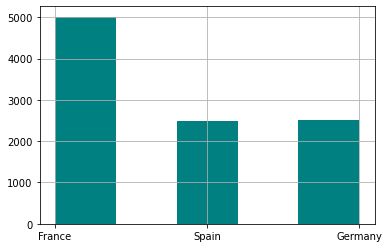

In [18]:
# Plotting a Histogram to show categories of location

dataset["Geography"].hist(bins=5, color= "teal")

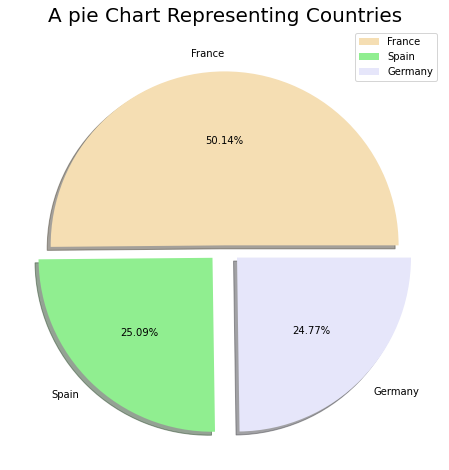

In [19]:
#plotting a pie chart of differents locations 

colors=["wheat","lightgreen","lavender"]
explode=[0,0.1,0.1]

plt.rcParams['figure.figsize']=(8,8)
plt.pie(dataset["Geography"].value_counts(),labels=dataset["Geography"].unique(),colors=colors,explode=explode,shadow=True,autopct="%.2f%%")
plt.title("A pie Chart Representing Countries",fontsize=20)
plt.legend()
plt.axis("off")
plt.show()

In [20]:
# Definning uniques values for Gender

dataset["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [21]:
# Counting the gender type values

dataset["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

<AxesSubplot:>

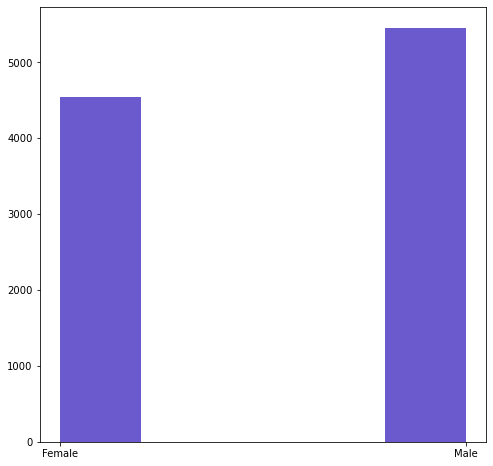

In [22]:
# Plotting a Histogram to show categories of location

dataset.Gender.hist(bins=5, grid=False, color="slateblue")

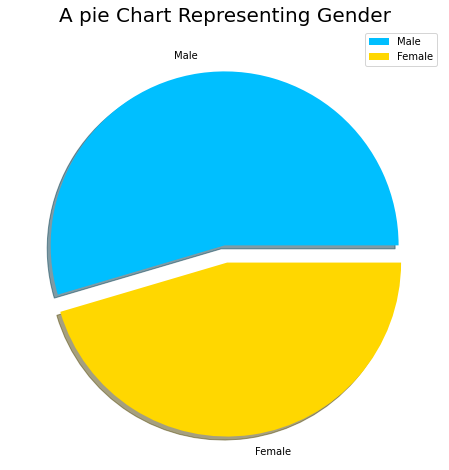

In [23]:
#plotting a pie chart of different gender 

size= [5457,4543]
labels= "Male", "Female"
colors=["deepskyblue","gold"]
explode=[0,0.1]

plt.rcParams['figure.figsize']=(8,8)
plt.pie(size,labels=labels,colors=colors,explode=explode,shadow=True)
plt.title("A pie Chart Representing Gender",fontsize = 20)
plt.legend()
plt.axis("off")
plt.show()

<AxesSubplot:>

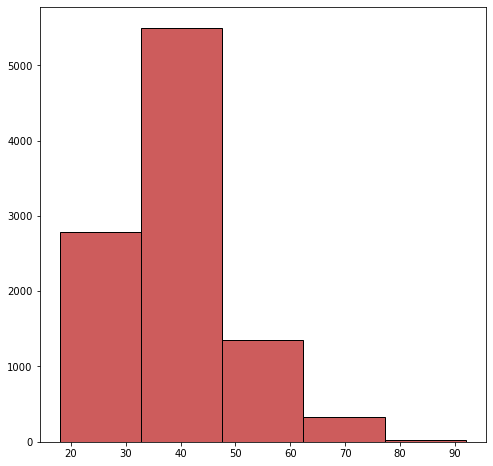

In [24]:
# Plotting the histogram of age 

dataset.Age.hist(bins=5, grid=False, color = "indianred", ec="black")

<AxesSubplot:>

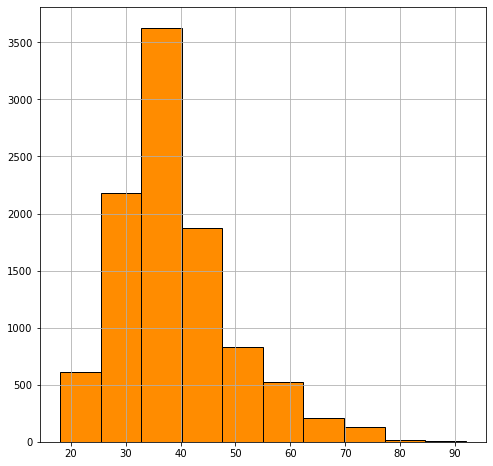

In [25]:
# Retrieving the age values and plotting it (a focus on range between 35 and 45)

dataset["Age"].loc[(dataset["Age"]>35) & dataset["Age"]<45].hist(color = "darkorange", ec="Black")

### **Bivariate Analysis**

In [26]:
# Calculating total balance in france, germany and spain

total_france = dataset.Balance[dataset.Geography == 'France'].sum()
total_germany = dataset.Balance[dataset.Geography == 'Germany'].sum()
total_spain = dataset.Balance[dataset.Geography == 'Spain'].sum()

print("Total Balance in France :",total_france)
print("Total Balance in Germany :",total_germany)
print("Total Balance in Spain :",total_spain)

Total Balance in France : 311332479.49
Total Balance in Germany : 300402861.38
Total Balance in Spain : 153123552.01


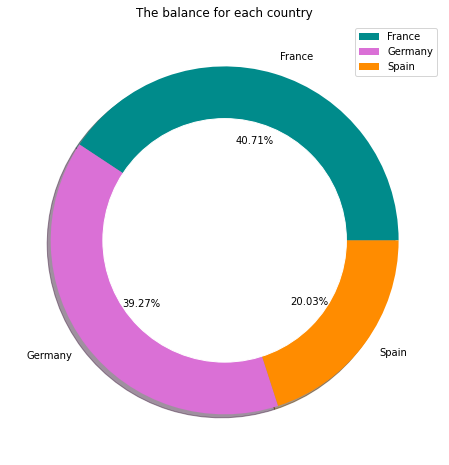

In [27]:
# Plotting a donut chart for visualizing balance for each country

labels = 'France', 'Germany', 'Spain'
colors = ['darkcyan', 'orchid', 'darkorange']
size =  [311, 300, 153]

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('The balance for each country', fontsize = 12)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

## **Data Processing**

In [28]:
# Removing the unecessary features from the dataset

dataset = dataset.drop(['CustomerId',"Surname","RowNumber"],axis=1)
dataset.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

dataset.head()

### **Train test split**

In [29]:
# Splitting 

X = dataset.iloc[:,0:10]
y=dataset.iloc[:,10]

print(X.columns)

print(X.shape)
print(y.shape)


Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')
(10000, 10)
(10000,)


In [30]:
#Encoding Categorical variables into numerical variables
#One hot encoding

X = pd.get_dummies(X)
X.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
5,645,44,8,113755.78,2,1,0,149756.71,0,0,1,0,1
6,822,50,7,0.00,2,1,1,10062.80,1,0,0,0,1
7,376,29,4,115046.74,4,1,0,119346.88,0,1,0,1,0
8,501,44,4,142051.07,2,0,1,74940.50,1,0,0,0,1
9,684,27,2,134603.88,1,1,1,71725.73,1,0,0,0,1


In [31]:
# Training the set 

from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(X,y, test_size =0.25,random_state=1)

print(train_X.shape)
print(train_y.shape)
print(test_y.shape)
print(test_X.shape)

(7500, 13)
(7500,)
(2500,)
(2500, 13)


### **Normalization**

In [32]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

train_X = pd.DataFrame(train_X)
train_X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.719980,1.256181,0.683089,-1.228601,-0.910949,0.642621,0.983339,-1.480501,1.0008,-0.582072,-0.573245,-0.917769,0.917769
1,-0.753272,-0.659527,-1.397668,-1.228601,0.800932,0.642621,-1.016944,-1.565230,1.0008,-0.582072,-0.573245,1.089599,-1.089599
2,0.575745,0.394112,-1.397668,-1.228601,0.800932,0.642621,-1.016944,-1.182108,-0.9992,-0.582072,1.744456,1.089599,-1.089599
3,1.791436,0.585683,-0.704082,0.844319,-0.910949,-1.556128,-1.016944,-0.692551,1.0008,-0.582072,-0.573245,-0.917769,0.917769
4,-1.577469,-0.659527,1.029882,-1.228601,0.800932,0.642621,-1.016944,-0.567289,1.0008,-0.582072,-0.573245,-0.917769,0.917769


## **Modeling**

### **Decision Tree Algorithm**

The Accuracy is: 79.44 %


<AxesSubplot:>

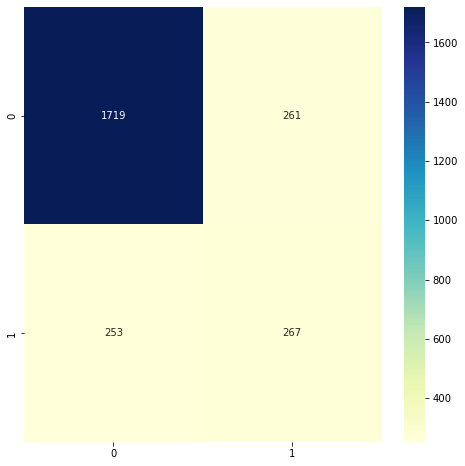

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

model_dc = DecisionTreeClassifier() 
model_dc.fit(train_X, train_y)

y_pred_dc = model_dc.predict(test_X)

accuracy_dc = round(model_dc.score(test_X, test_y) * 100, 2)
print('The Accuracy is: ' +str(accuracy_dc) + ' %')

#plot matrix of confusion
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm_dc = confusion_matrix(test_y, y_pred_dc)
sns.heatmap(cm_dc, annot=True, fmt='3.0f', cmap="YlGnBu")


#grid search for optimization

### Random Forest 

The Accuracy is: 86.04 %


<AxesSubplot:>

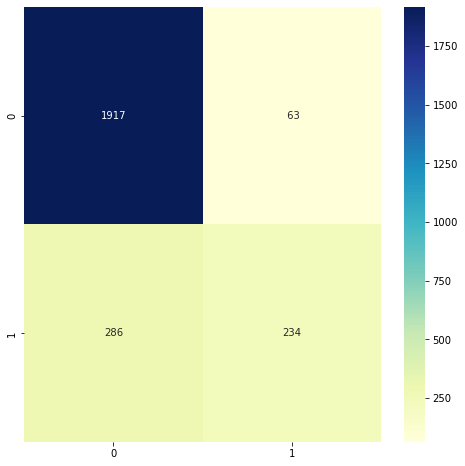

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

model_rf = RandomForestClassifier() 
model_rf.fit(train_X, train_y)

y_pred_rf = model_rf.predict(test_X)

accurancy_rf = round(model_rf.score(test_X, test_y) * 100, 2)
print('The Accuracy is: ' +str(accurancy_rf) + ' %')

#plot matrix of confusion
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(test_y, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='3.0f', cmap="YlGnBu")

In [35]:
# Cross Validation 

from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator=model_rf , X = train_X, y =train_y , cv =5)

print(cvs)

[0.86666667 0.85866667 0.85266667 0.864      0.85533333]


In [36]:
print("Mean of cvs ", round(cvs.mean()*100 , 2))

Mean of cvs  85.95


### Logistic regression

The Accuracy is: 81.08 %


<AxesSubplot:>

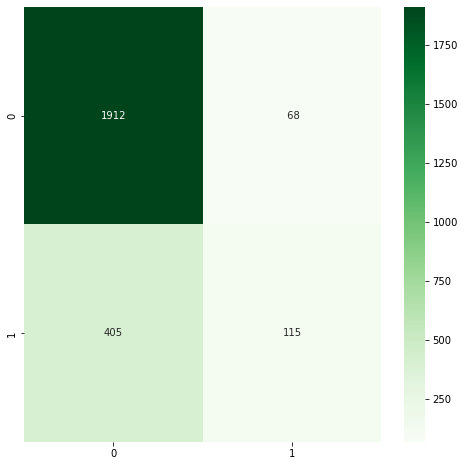

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

model_lr = LogisticRegression() 
model_lr.fit(train_X, train_y)

y_pred_lr = model_lr.predict(test_X)

accurancy_lr = round(model_lr.score(test_X, test_y) * 100, 2)
print('The Accuracy is: ' +str(accurancy_lr) + ' %')

#plot matrix of confusion
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(test_y, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='3.0f', cmap="Greens")

In [38]:
models = pd.DataFrame({
    'model':["Decision Trees", "Logistic Regression","Random forest"],
    "Score":[accuracy_dc,accurancy_lr,accurancy_rf]
    
})
models.sort_values(by='Score',ascending=False)

,model,Score
2,Random forest,86.04
1,Logistic Regression,81.08
0,Decision Trees,79.44
